In [38]:
!pip install -r requirements.txt

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib inline # disabled the widget function
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [44]:
# Softmax function Numpy implementation
def my_softmax(z):
    ez_sum = 0
    a = 0

    for j in range(len(z)):
        ez_sum += np.exp(z[j])
        a = np.exp(z)/ez_sum

    return a

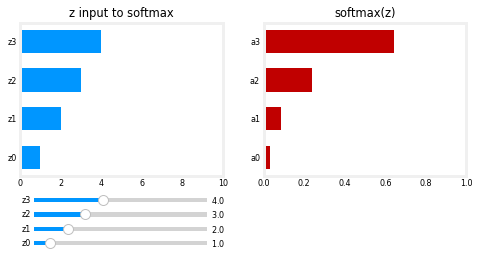

In [45]:
plt.close('all')
plt_softmax(my_softmax)

#### problem statement

Use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected.

In [46]:
# Load the dataset
X, y = load_data()

In [47]:
# View variables
print('The first element of X is:', X[0])

The first element of X is: [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01

In [48]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 9


In [49]:
# Check the dimensions of your variables.
print('The shape of X is:' + str(X.shape))
print('The shape of y is:' + str(y.shape))

The shape of X is:(5000, 400)
The shape of y is:(5000, 1)


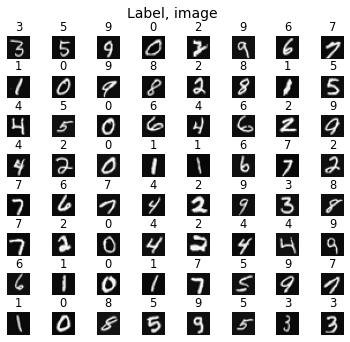

In [50]:
# Visualize the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [51]:
# Tensorflow model implementation.
from pkg_resources import add_activation_listener


tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        tf.keras.Input((400,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear'),

    ], name = 'my_model'
)

In [52]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [54]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 825us/step - loss: 1.7094
Epoch 2/40
157/157 [==============================] - 0s 810us/step - loss: 0.7480
Epoch 3/40
157/157 [==============================] - 0s 820us/step - loss: 0.4428
Epoch 4/40
157/157 [==============================] - 0s 830us/step - loss: 0.3463
Epoch 5/40
157/157 [==============================] - 0s 824us/step - loss: 0.2977
Epoch 6/40
157/157 [==============================] - 0s 832us/step - loss: 0.2630
Epoch 7/40
157/157 [==============================] - 0s 848us/step - loss: 0.2361
Epoch 8/40
157/157 [==============================] - 0s 834us/step - loss: 0.2131
Epoch 9/40
157/157 [==============================] - 0s 835us/step - loss: 0.2004
Epoch 10/40
157/157 [==============================] - 0s 849us/step - loss: 0.1805
Epoch 11/40
157/157 [==============================] - 0s 817us/step - loss: 0.1692
Epoch 12/40
157/157 [==============================] - 0s 798us/step - loss: 0.1580
E

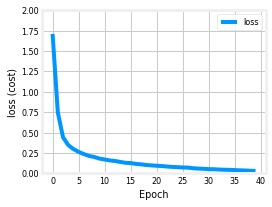

In [55]:
# Plot loss (cost)
plot_loss_tf(history)

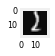

1/1 [==============================] - 0s 39ms/step
prediction a Two: 
[[ -7.99  -2.23   0.77  -2.41 -11.66 -11.15  -9.53  -3.36  -4.42  -7.17]]
Largest Prediction index: 2


In [56]:
# Prediction
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))

print(f'prediction a Two: \n{prediction}')
print(f'Largest Prediction index: {np.argmax(prediction)}')

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [57]:
prediction_p = tf.nn.softmax(prediction)

print(f"predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.42e-04 4.49e-02 8.98e-01 3.76e-02 3.61e-06 5.97e-06 3.03e-05 1.44e-02
  5.03e-03 3.22e-04]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [58]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 9ms/step


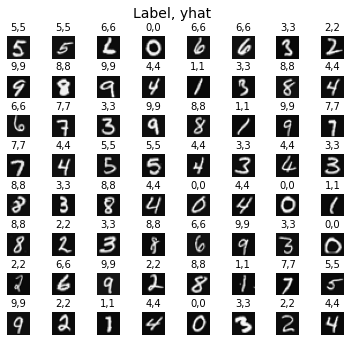

In [59]:
# Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 8ms/step
15 errors out of 5000 images


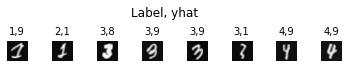

In [60]:
# Check some of the errors
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")